In [2]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
import pandas as pd

# Load variable names and data
var_names_url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv"
data_url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv"

# Load the data
columns_to_load = [
    'WELLNESS_self_rated_mental_health',
    'CONNECTION_social_time_family_p7d', 
    'GEO_province', 
    'DEMO_household_income'
]
data = pd.read_csv(data_url, usecols=columns_to_load, na_values=["9999", "", " ", "Presented but no response", "NA"], low_memory=False)

# Map the outcome variable to numeric
category_mapping = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Very Good': 4, 'Excellent': 5}
data['WELLNESS_self_rated_mental_health'] = data['WELLNESS_self_rated_mental_health'].map(category_mapping)

# Define region mapping
province_mapping = {
    'british columbia': 'western canada',
    'alberta': 'western canada',
    'saskatchewan': 'western canada',
    'manitoba': 'western canada',
    'ontario': 'ontario',
    'quebec': 'quebec',
    'newfoundland and labrador': 'eastern canada',
    'prince edward island': 'eastern canada',
    'nova scotia': 'eastern canada',
    'new brunswick': 'eastern canada',
    'yukon': 'northern canada',
    'northwest territories': 'northern canada',
    'nunavut': 'northern canada'
}

# Standardize province names and map regions
data['GEO_province'] = data['GEO_province'].str.strip().str.lower()
data['REGION'] = data['GEO_province'].map(province_mapping)

# Define income mapping
income_mapping = {
    'Under $5,000': 'low',
    '$20,000 to $24,999': 'low',
    '$10,000 to $14,999': 'low',
    '$25,000 to $29,999': 'low',
    '$15,000 to $19,999': 'low',
    '$30,000 to $34,999': 'low',
    '$35,000 to $39,999': 'low',
    '$40,000 to $44,999': 'low',
    '$45,000 to $49,999': 'low',
    '$50,000 to $59,999': 'low',
    '$60,000 to $69,999': 'low',
    '$70,000 to $79,999': 'low',
    '$80,000 to $89,999': 'low',
    '$90,000 to $99,999': 'upper',
    '$140,000 to $149,999': 'upper',
    '$150,000 to $159,999': 'upper',
    '$100,000 to $109,999': 'upper',
    '$120,000 to $129,999': 'upper',
    '$190,000 to $199,999': 'upper',
    '$110,000 to $119,999': 'upper',
    '$170,000 to $179,999': 'upper',
    '$130,000 to $139,999': 'upper',
    '$200,000 or more': 'upper',
    '$160,000 to $169,999': 'upper',
    '$180,000 to $189,999': 'upper'
}
data['Income_group'] = data['DEMO_household_income'].map(income_mapping)

# Bin and label the social connection variables
data['family_time_grouped'] = pd.cut(
    data['CONNECTION_social_time_family_p7d'], 
    bins=[-1, 0, 2, 168], 
    labels=["0", "1-2", "more than 2"]
)

# Formula for ordinal regression
formula = """
    WELLNESS_self_rated_mental_health ~
    C(family_time_grouped, Treatment(reference="1-2")) +
    C(Income_group, Treatment(reference="low")) + 
    C(REGION, Treatment(reference="ontario"))
"""

# Fit the ordinal logistic regression model
model = OrderedModel.from_formula(formula, data=data, distr='logit')
result = model.fit(method='bfgs')

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.237121
         Iterations: 46
         Function evaluations: 47
         Gradient evaluations: 47
                                     OrderedModel Results                                    
Dep. Variable:     WELLNESS_self_rated_mental_health   Log-Likelihood:                -2072.2
Model:                                  OrderedModel   AIC:                             4164.
Method:                           Maximum Likelihood   BIC:                             4219.
Date:                               Fri, 29 Nov 2024                                         
Time:                                       02:31:12                                         
No. Observations:                               1675                                         
Df Residuals:                                   1665                                         
Df Model:                                          7                        

/tmp/ipykernel_70/4228166366.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_avg_mental_health, x='REGION', y='WELLNESS_self_rated_mental_health',


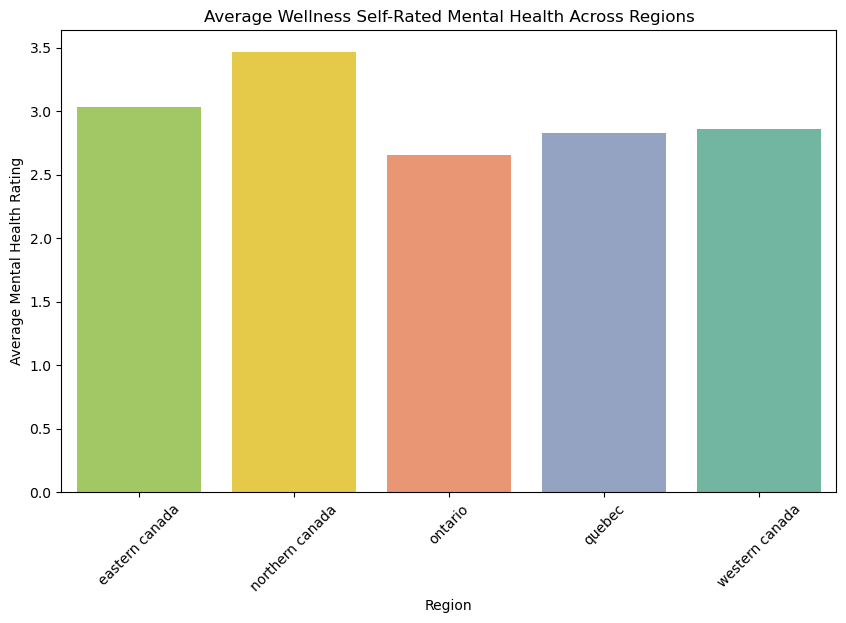

/tmp/ipykernel_70/4228166366.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_avg_mental_health, x='Income_group', y='WELLNESS_self_rated_mental_health',


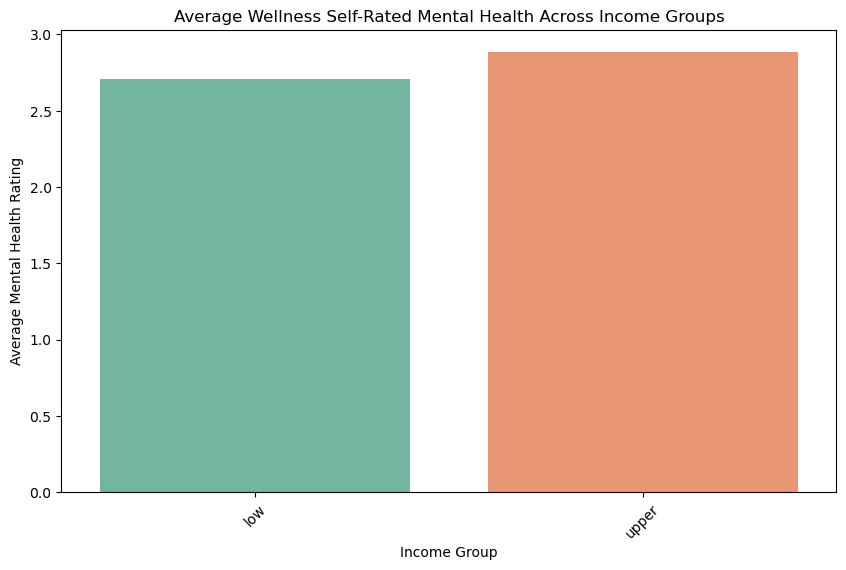

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the color palette for consistent colors
palette = sns.color_palette("Set2", n_colors=7)  # Adjust the number of colors if needed

# Create a mapping for each REGION to a specific color
region_color_map = dict(zip(data['REGION'].unique(), palette))

# Create a mapping for each Income_group to a specific color
income_group_color_map = dict(zip(data['Income_group'].unique(), palette))

# Average WELLNESS_self_rated_mental_health across regions
plt.figure(figsize=(10, 6))

# Calculate the average WELLNESS_self_rated_mental_health for each REGION
region_avg_mental_health = data.groupby('REGION')['WELLNESS_self_rated_mental_health'].mean().reset_index()

# Plot the average WELLNESS_self_rated_mental_health by region with a consistent color palette
sns.barplot(data=region_avg_mental_health, x='REGION', y='WELLNESS_self_rated_mental_health', 
            palette=region_color_map)
plt.title("Average Wellness Self-Rated Mental Health Across Regions")
plt.ylabel("Average Mental Health Rating")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

# Average WELLNESS_self_rated_mental_health across income groups
plt.figure(figsize=(10, 6))

# Calculate the average WELLNESS_self_rated_mental_health for each Income_group
income_avg_mental_health = data.groupby('Income_group')['WELLNESS_self_rated_mental_health'].mean().reset_index()

# Plot the average WELLNESS_self_rated_mental_health by income group with a consistent color palette
sns.barplot(data=income_avg_mental_health, x='Income_group', y='WELLNESS_self_rated_mental_health', 
            palette=income_group_color_map)
plt.title("Average Wellness Self-Rated Mental Health Across Income Groups")
plt.ylabel("Average Mental Health Rating")
plt.xlabel("Income Group")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_70/2020098756.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_avg_mental_health = data.groupby(['family_time_grouped', 'REGION'])['WELLNESS_self_rated_mental_health'].mean().reset_index()


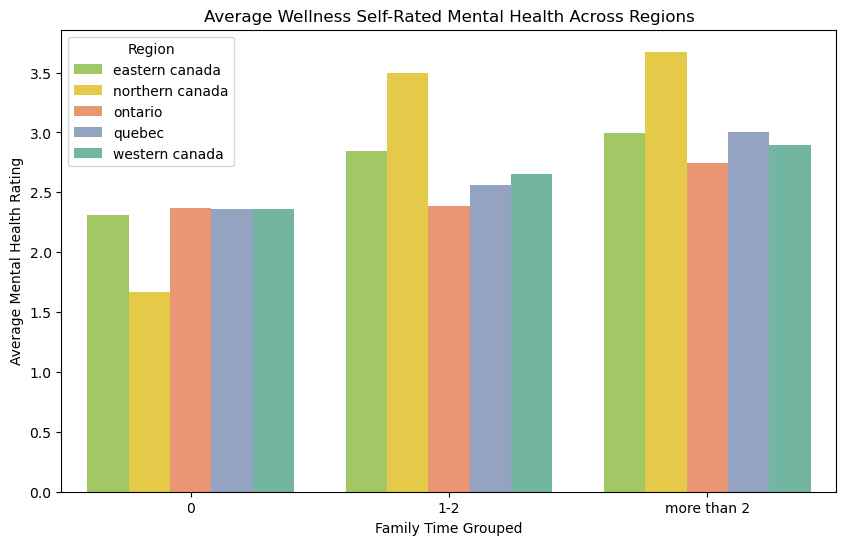

/tmp/ipykernel_70/2020098756.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_avg_mental_health = data.groupby(['family_time_grouped', 'Income_group'])['WELLNESS_self_rated_mental_health'].mean().reset_index()


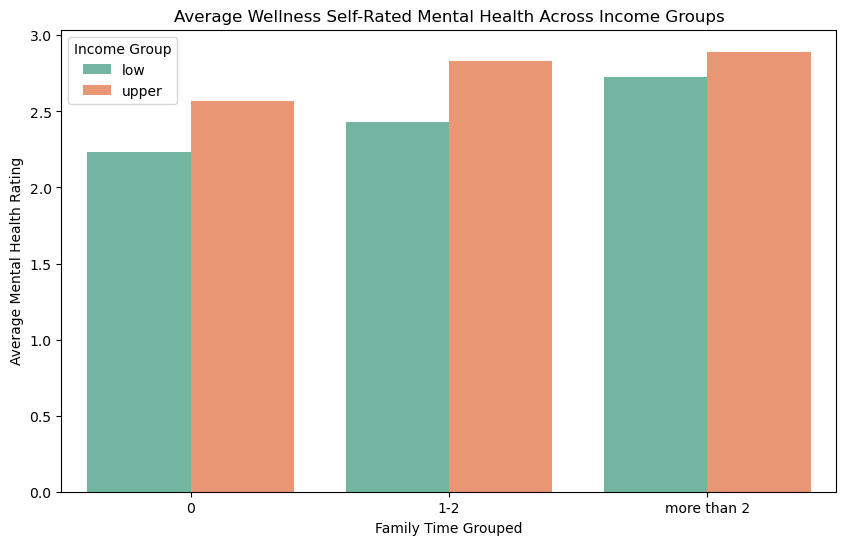

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the color palette for consistent colors
palette = sns.color_palette("Set2", n_colors=7)  # Adjust the number of colors if needed

# Create a mapping for each REGION to a specific color
region_color_map = dict(zip(data['REGION'].unique(), palette))

# Create a mapping for each Income_group to a specific color
income_group_color_map = dict(zip(data['Income_group'].unique(), palette))

# Family time distribution across regions (with average WELLNESS_self_rated_mental_health)
plt.figure(figsize=(10, 6))

# Calculate the average WELLNESS_self_rated_mental_health for each family_time_grouped within each REGION
region_avg_mental_health = data.groupby(['family_time_grouped', 'REGION'])['WELLNESS_self_rated_mental_health'].mean().reset_index()

# Plot the average WELLNESS_self_rated_mental_health with consistent colors
sns.barplot(data=region_avg_mental_health, x='family_time_grouped', y='WELLNESS_self_rated_mental_health', 
            hue='REGION', palette=region_color_map)
plt.title("Average Wellness Self-Rated Mental Health Across Regions")
plt.ylabel("Average Mental Health Rating")
plt.xlabel("Family Time Grouped")
plt.legend(title="Region")
plt.show()

# Family time distribution across income groups (with average WELLNESS_self_rated_mental_health)
plt.figure(figsize=(10, 6))

# Calculate the average WELLNESS_self_rated_mental_health for each family_time_grouped within each Income_group
income_avg_mental_health = data.groupby(['family_time_grouped', 'Income_group'])['WELLNESS_self_rated_mental_health'].mean().reset_index()

# Plot the average WELLNESS_self_rated_mental_health with consistent colors
sns.barplot(data=income_avg_mental_health, x='family_time_grouped', y='WELLNESS_self_rated_mental_health', 
            hue='Income_group', palette=income_group_color_map)
plt.title("Average Wellness Self-Rated Mental Health Across Income Groups")
plt.ylabel("Average Mental Health Rating")
plt.xlabel("Family Time Grouped")
plt.legend(title="Income Group")
plt.show()

In [11]:
# Formula for ordinal regression predicting family time
family_time_formula = """
    family_time_grouped ~
    C(REGION, Treatment(reference="ontario")) +
    C(Income_group, Treatment(reference="low"))
"""

# Fit the ordinal logistic regression model
family_time_model = OrderedModel.from_formula(family_time_formula, data=data, distr='logit')
family_time_result = family_time_model.fit(method='bfgs')

# Print the summary of the model
print(family_time_result.summary())

Optimization terminated successfully.
         Current function value: 0.835105
         Iterations: 36
         Function evaluations: 38
         Gradient evaluations: 38
                              OrderedModel Results                             
Dep. Variable:     family_time_grouped   Log-Likelihood:                -1889.8
Model:                    OrderedModel   AIC:                             3794.
Method:             Maximum Likelihood   BIC:                             3834.
Date:                 Fri, 29 Nov 2024                                         
Time:                         02:48:46                                         
No. Observations:                 2263                                         
Df Residuals:                     2256                                         
Df Model:                            5                                         
                                                                   coef    std err          z      P>|z|    